# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt  

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90, high = 90, size=1500)
lngs = np.random.uniform(low = -180, high = 180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
count = 0
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print(f"Beginning Data Retrieval")
print(f"------------------------------")
for city in cities:
        url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
#         print(url)
        weather_response = requests.get(url)
        weather_json = weather_response.json()
#         print(weather_json)
        try: 
            Cloudiness.append(weather_json['clouds']["all"])
            Country.append(weather_json['sys']["country"])
            Date.append(weather_json["dt"])
            Humidity.append(weather_json["main"]['humidity'])
            Lat.append(weather_json["coord"]['lat'])
            Lng.append(weather_json["coord"]['lon'])
            Max_Temp.append(weather_json["main"]['temp_max'])
            Wind_Speed.append(weather_json["wind"]['speed'])
            print( "Requesting " , count,"......" ,city)
            count = count + 1
            
        except KeyError:
        
            Cloudiness.append("")
            Country.append("")
            Date.append("")
            Humidity.append("")
            Lat.append("")
            Lng.append("")
            Max_Temp.append("")
            Wind_Speed.append("")
            print("Requesting " , count,"......" ,city, ".....Empty value, try again...")
            count = count + 1

Beginning Data Retrieval
------------------------------
Requesting  0 ...... butaritari
Requesting  1 ...... ribeira grande
Requesting  2 ...... dikson
Requesting  3 ...... hokitika
Requesting  4 ...... belmonte
Requesting  5 ...... husavik
Requesting  6 ...... sitka
Requesting  7 ...... kaitangata
Requesting  8 ...... skibbereen
Requesting  9 ...... puerto carreno
Requesting  10 ...... qaanaaq
Requesting  11 ...... qaqortoq
Requesting  12 ...... bredasdorp
Requesting  13 ...... torrox
Requesting  14 ...... baykit
Requesting  15 ...... tuktoyaktuk
Requesting  16 ...... busselton
Requesting  17 ...... kontagora
Requesting  18 ...... lorengau
Requesting  19 ...... frederico westphalen
Requesting  20 ...... atuona
Requesting  21 ...... ushuaia
Requesting  22 ...... ust-tsilma
Requesting  23 ...... mataura
Requesting  24 ...... barentsburg .....Empty value, try again...
Requesting  25 ...... sikasso
Requesting  26 ...... kapaa
Requesting  27 ...... ouallam
Requesting  28 ...... tasiilaq
Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#display the data frame
cities_df = pd.DataFrame({
                            "City" : cities, 
                            "Cloudiness" : Cloudiness,
                            "Country" : Country, 
                            "Date" : Date,
                            "Humidity" : Humidity, 
                            "Lat" : Lat,
                            "Lng" : Lng,
                            "Max_Temp" : Max_Temp,
                            "Wind_Speed" : Wind_Speed
                        })
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,butaritari,0,KI,1595208768,77,3.07,172.79,83.61,15.28
1,ribeira grande,55,PT,1595208764,77,38.52,-28.7,69.06,2.77
2,dikson,99,RU,1595208773,96,73.51,80.55,41.45,10.25
3,hokitika,100,NZ,1595209285,74,-42.72,170.97,56.89,6.44
4,belmonte,40,BR,1595208807,94,-15.86,-38.88,69.8,5.82
...,...,...,...,...,...,...,...,...,...
629,yajalon,91,MX,1595209410,98,17.23,-92.33,67.21,1.86
630,clyde river,1,CA,1595209410,75,70.47,-68.59,44.6,6.93
631,norrtalje,100,SE,1595209411,67,59.76,18.7,66,4
632,bougouni,22,ML,1595209411,90,11.42,-7.48,73.63,3.96


In [7]:
#save the file into a CSV file in the Resources Folder
cities_df.to_csv("Resources/cities.csv", encoding="utf-8", index=False)

In [126]:
#Replace the emppty values with Nan=N, then clean the data frame from the NaN values
nan_value = float("NaN")
cities_df.replace("", nan_value, inplace = True)
cities_df.dropna(subset = ["Cloudiness"], inplace = True)
cities_df.dropna(subset = ["Country"], inplace = True)
cities_df.dropna(subset = ["Date"], inplace = True)
cities_df.dropna(subset = ["Humidity"], inplace = True)
cities_df.dropna(subset = ["Lat"], inplace = True)
cities_df.dropna(subset = ["Lng"], inplace = True)
cities_df.dropna(subset = ["Max_Temp"], inplace = True)
cities_df.dropna(subset = ["Wind_Speed"], inplace = True)
clean_city_data_df = cities_df
clean_city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,butaritari,0.0,KI,1.595209e+09,77.0,3.07,172.79,83.61,15.28
1,ribeira grande,55.0,PT,1.595209e+09,77.0,38.52,-28.70,69.06,2.77
2,dikson,99.0,RU,1.595209e+09,96.0,73.51,80.55,41.45,10.25
3,hokitika,100.0,NZ,1.595209e+09,74.0,-42.72,170.97,56.89,6.44
4,belmonte,40.0,BR,1.595209e+09,94.0,-15.86,-38.88,69.80,5.82
...,...,...,...,...,...,...,...,...,...
629,yajalon,91.0,MX,1.595209e+09,98.0,17.23,-92.33,67.21,1.86
630,clyde river,1.0,CA,1.595209e+09,75.0,70.47,-68.59,44.60,6.93
631,norrtalje,100.0,SE,1.595209e+09,67.0,59.76,18.70,66.00,4.00
632,bougouni,22.0,ML,1.595209e+09,90.0,11.42,-7.48,73.63,3.96


In [10]:
clean_city_data_df.count()

City          581
Cloudiness    581
Country       581
Date          581
Humidity      581
Lat           581
Lng           581
Max_Temp      581
Wind_Speed    581
dtype: int64

In [12]:
#Save the new clean file in the same folder as the other file
clean_city_data_df.to_csv("Resources/clean_cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
clean_city_data_hum_df = clean_city_data_df[clean_city_data_df["Humidity"]>100]
clean_city_data_hum_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed


There are no cities with Humidity higher tham 100, so we proceed to next step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

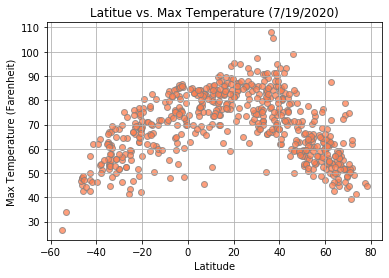

<Figure size 432x288 with 0 Axes>

In [14]:
lat = clean_city_data_df ["Lat"]
temp = clean_city_data_df ["Max_Temp"]

plt.scatter(lat, temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Latitue vs. Max Temperature (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

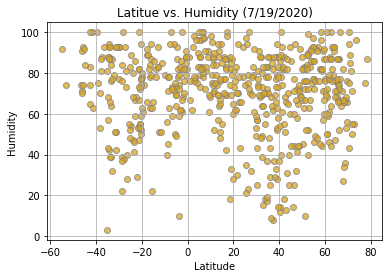

<Figure size 432x288 with 0 Axes>

In [15]:
lat = clean_city_data_df ["Lat"]
hum = clean_city_data_df ["Humidity"]

plt.scatter(lat, hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

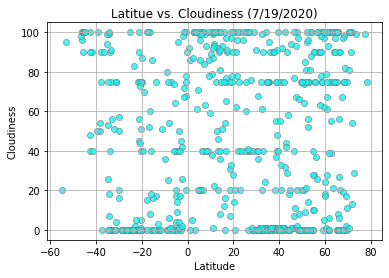

<Figure size 432x288 with 0 Axes>

In [16]:
lat = clean_city_data_df ["Lat"]
cloud = clean_city_data_df ["Cloudiness"]

plt.scatter(lat, cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

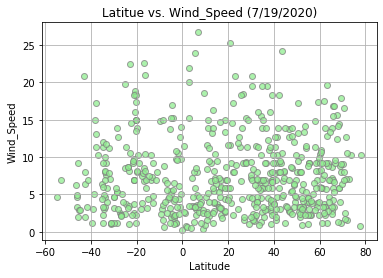

<Figure size 432x288 with 0 Axes>

In [17]:
lat = clean_city_data_df ["Lat"]
wind = clean_city_data_df ["Wind_Speed"]

plt.scatter(lat, wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_WindSpeed.png")

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]>0]
northern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,butaritari,0.0,KI,1.595209e+09,77.0,3.07,172.79,83.61,15.28
1,ribeira grande,55.0,PT,1.595209e+09,77.0,38.52,-28.70,69.06,2.77
2,dikson,99.0,RU,1.595209e+09,96.0,73.51,80.55,41.45,10.25
5,husavik,90.0,IS,1.595209e+09,87.0,66.04,-17.34,44.60,3.36
6,sitka,90.0,US,1.595209e+09,93.0,57.05,-135.33,57.20,5.10
...,...,...,...,...,...,...,...,...,...
629,yajalon,91.0,MX,1.595209e+09,98.0,17.23,-92.33,67.21,1.86
630,clyde river,1.0,CA,1.595209e+09,75.0,70.47,-68.59,44.60,6.93
631,norrtalje,100.0,SE,1.595209e+09,67.0,59.76,18.70,66.00,4.00
632,bougouni,22.0,ML,1.595209e+09,90.0,11.42,-7.48,73.63,3.96


In [19]:
southern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]<0]
southern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
3,hokitika,100.0,NZ,1.595209e+09,74.0,-42.72,170.97,56.89,6.44
4,belmonte,40.0,BR,1.595209e+09,94.0,-15.86,-38.88,69.80,5.82
7,kaitangata,96.0,NZ,1.595209e+09,71.0,-46.28,169.85,45.00,3.36
12,bredasdorp,18.0,ZA,1.595209e+09,93.0,-34.53,20.04,53.60,2.26
16,busselton,0.0,AU,1.595209e+09,64.0,-33.65,115.33,57.99,10.07
...,...,...,...,...,...,...,...,...,...
609,villa carlos paz,75.0,AR,1.595209e+09,93.0,-31.42,-64.50,55.99,1.12
611,vao,5.0,NC,1.595209e+09,68.0,-22.67,167.48,69.28,14.54
621,emerald,83.0,AU,1.595209e+09,41.0,-23.53,148.17,73.99,1.01
625,eldorado,0.0,BR,1.595209e+09,68.0,-23.79,-54.28,67.05,8.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

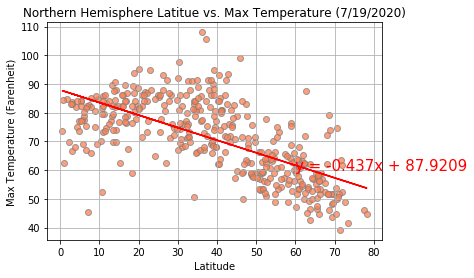

 R-squared is 0.4377635058135982


<Figure size 432x288 with 0 Axes>

In [21]:
n_lat = northern_hemisphere_df ["Lat"]
n_temp = northern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(n_lat, n_temp,color="coral", edgecolors="grey", alpha=0.75)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(60,60), fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Northern Hemisphere Latitue vs. Max Temperature (7/19/2020)")

plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Temperature.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

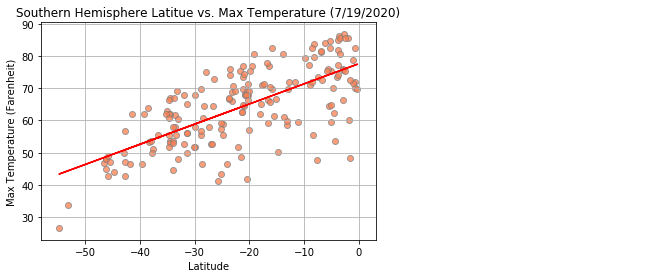

 R-squared is 0.4884902643437783


<Figure size 432x288 with 0 Axes>

In [119]:
s_lat = southern_hemisphere_df ["Lat"]
s_temp = southern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(20,20), fontsize = 15, color = "red")

plt.scatter(s_lat, s_temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Southern Hemisphere Latitue vs. Max Temperature (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Temperature.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

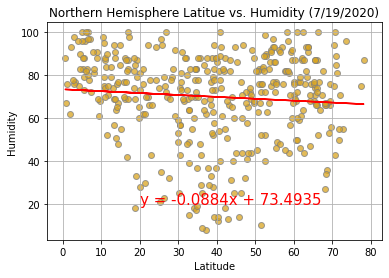

 R-squared is 0.007560558873188003


<Figure size 432x288 with 0 Axes>

In [120]:
n_lat = northern_hemisphere_df ["Lat"]
n_hum = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(20,20), fontsize = 15, color = "red")

plt.scatter(n_lat, n_hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Humidity.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

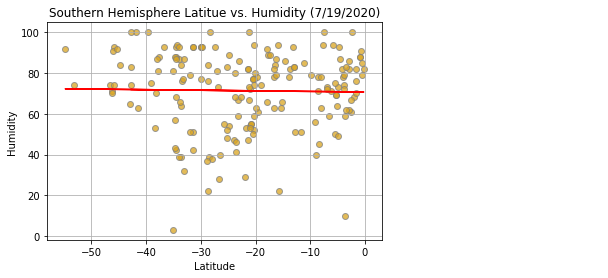

 R-squared is 0.00040749545819189536


<Figure size 432x288 with 0 Axes>

In [121]:
s_lat = southern_hemisphere_df ["Lat"]
s_hum = southern_hemisphere_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum )
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(10,50), fontsize = 15, color = "red")

plt.scatter(s_lat,s_hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Humidity.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

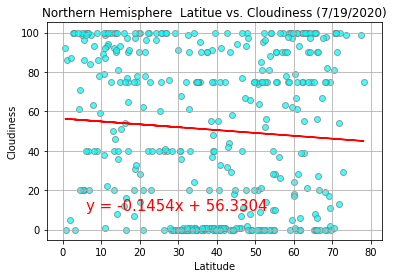

 R-squared is 0.005474421193855823


<Figure size 432x288 with 0 Axes>

In [122]:
n_lat = northern_hemisphere_df ["Lat"]
n_cloud = northern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(n_lat, n_cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere  Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Cloudiness.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

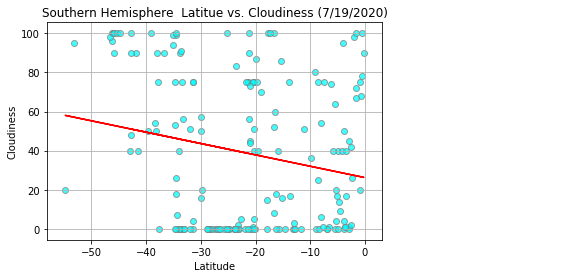

 R-squared is 0.04150198238742484


<Figure size 432x288 with 0 Axes>

In [123]:
s_lat = southern_hemisphere_df ["Lat"]
s_cloud = southern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(s_lat, s_cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere  Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Cloudiness.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

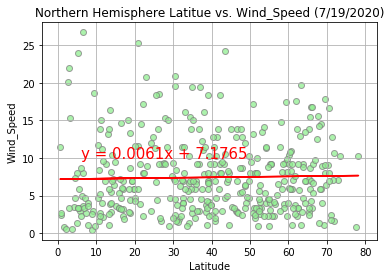

 R-squared is 0.0006059579178222406


<Figure size 432x288 with 0 Axes>

In [124]:
n_lat = northern_hemisphere_df ["Lat"]
n_wind = northern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(n_lat, n_wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Northern Hemisphere Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Wind.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

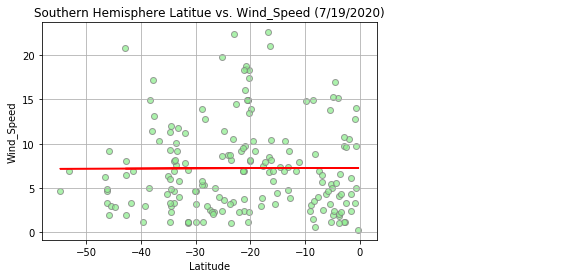

 R-squared is 1.4668200889513684e-05


<Figure size 432x288 with 0 Axes>

In [125]:
s_lat = southern_hemisphere_df ["Lat"]
s_wind = southern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat,s_wind)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(s_lat, s_wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Southern Hemisphere Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Wind.png")
print(f" R-squared is {rvalue**2}")